In [1]:
import geopandas as gpd

In [2]:
# geojson containing chennai zones outlines
chennai_zones = gpd.read_file("geojsons/chennai_zones.geojson")
chennai_zones

,Zone_No,Zone Name,geometry
0,-,St. Thomas Mount,"POLYGON ((80.20360 13.01107, 80.20371 13.00732..."
1,I,Zone 1,"POLYGON ((80.31870 13.18875, 80.31730 13.18332..."
2,II,Zone 2,"POLYGON ((80.28392 13.22739, 80.28428 13.22715..."
3,III,Zone 3,"POLYGON ((80.20612 13.17463, 80.20646 13.17447..."
4,IV,Zone 4,"POLYGON ((80.25939 13.14648, 80.26025 13.14594..."
5,IX,Zone 9,"POLYGON ((80.25385 13.06880, 80.25466 13.06809..."
6,V,Zone 5,"POLYGON ((80.28897 13.12288, 80.28977 13.12283..."
7,VI,Zone 6,"POLYGON ((80.21804 13.13033, 80.21882 13.13008..."
8,VII,Zone 7,"POLYGON ((80.18230 13.13530, 80.18263 13.13526..."
9,VIII,Zone 8,"POLYGON ((80.20705 13.11446, 80.20701 13.11199..."


In [3]:
chennai_zones.plot()

In [4]:
# Zone 13 outline - velachery
zone13 = chennai_zones.geometry[13]

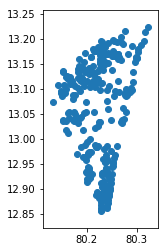

In [5]:
# Water sources in the city of chennai
chennai_water = gpd.read_file("geojsons/chennai_water.geojson")
chennai_water.plot()

In [6]:
from osmxtract import overpass

In [7]:
def get_geojson(bounds):
    query = overpass.ql_query(bounds, tag='building')
    response = overpass.request(query)
    return(response)

In [8]:
new_bound = (zone13.bounds[1],zone13.bounds[0],zone13.bounds[3],zone13.bounds[2])

In [9]:
buildings= get_geojson(new_bound)

In [10]:
buildings = overpass.as_geojson(buildings,"polygon")

In [11]:
buildings = gpd.GeoDataFrame.from_features(buildings)

In [12]:
bound_gdframe = gpd.GeoDataFrame({'geometry': [zone13]})

In [13]:
buildings = buildings[:10000]

In [14]:
buildings_in_zone13 = gpd.overlay(buildings, bound_gdframe, how='intersection')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/geopandas/base.py:105: UserWarning: Cannot generate spatial index: Missing package `rtree`.
  warn("Cannot generate spatial index: Missing package `rtree`.")


AttributeError: 'NoneType' object has no attribute 'intersection'

In [ ]:
buildings_in_zone13.plot()